For the bmi_data.xlsx dataset provided, 

- take the even-numbered subjects and 
- fit the BMI Index distribution with using an exponential family where the sufficient statistic vector is composed of powers of the BMI Index.
- After fitting the different exponential families, plot the histogram of the odd-numbered subjects. Up to what power of the BMI Index does it seem reasonable to include in our exponential family model based on the deviation from the histogram of odd-numbered subjects?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln
from scipy.optimize import minimize
from scipy import integrate
#lines for fancy ploting
import seaborn as sns
import warnings
from pylab import rcParams

In [2]:
#set some values for the plots
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(42)

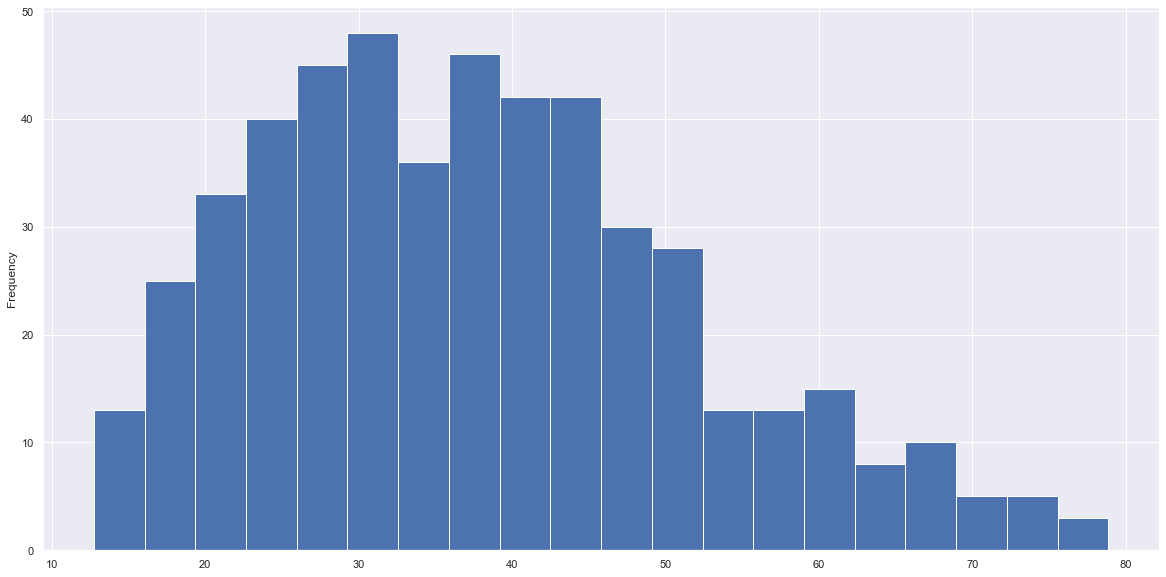

In [3]:
bmi_data = pd.read_excel('bmi_data.xlsx')
bmi_data
bmi_data['BMI'].plot(kind='hist', figsize=(20,10),bins=20)

<BarContainer object of 20 artists>

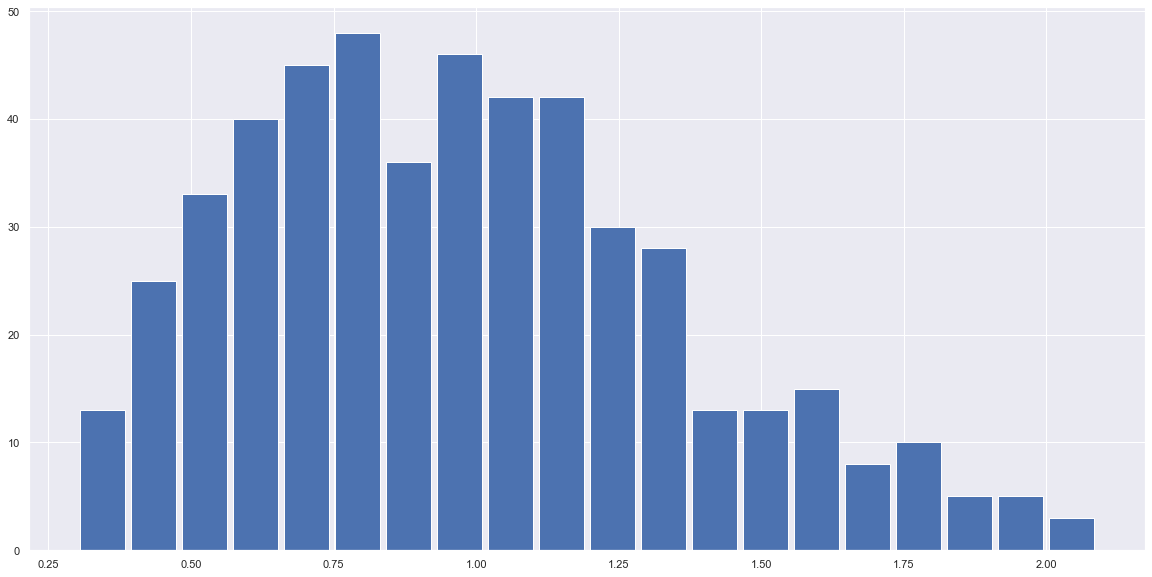

In [4]:
freqs, bins = np.histogram(bmi_data["BMI"], bins=20)
bmi_median = bmi_data["BMI"].median()
bmi_data["BMI"] = bmi_data["BMI"] / (bmi_median)
bins = bins / (bmi_median)


plt.figure(figsize=(20,10))
plt.bar(bins[:-1], freqs,width=0.08)

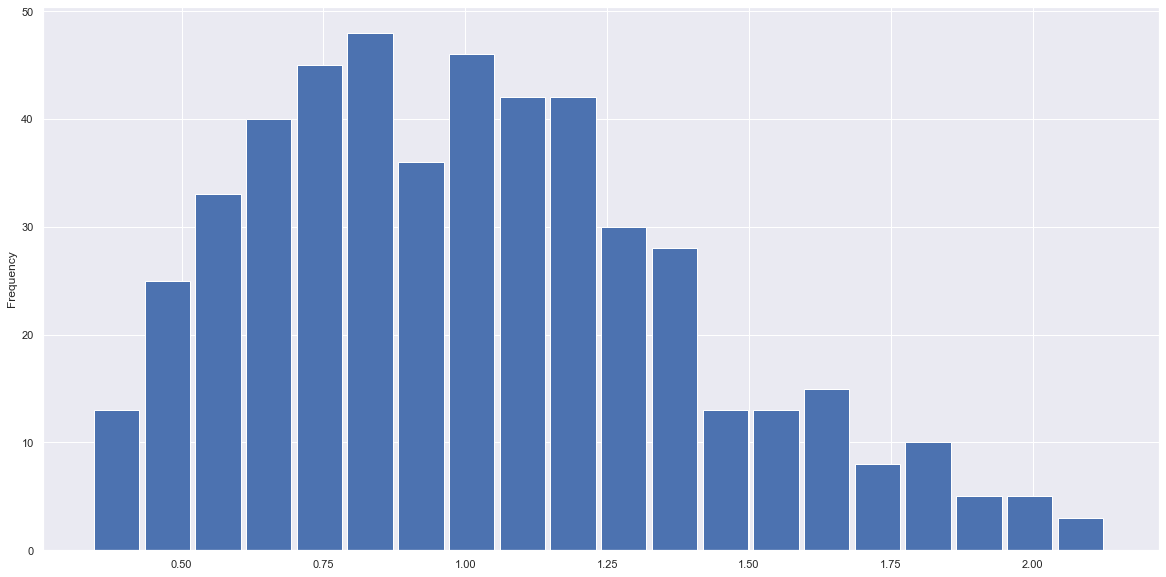

In [5]:
bmi_data['BMI'].plot(kind='hist', figsize=(20,10),bins=20,width=0.08)

In [6]:
#take the even-numbered subjects
evens = bmi_data.loc[bmi_data["Number"] % 2 ==0]
odds = bmi_data.loc[bmi_data["Number"] % 2 !=0]

evens_bmi = pd.DataFrame(evens.loc[:,"BMI"])
odds_bmi = pd.DataFrame(odds.loc[:,"BMI"])



In [7]:
#create a grid of 10 values

for i in range(2,10):
    evens_bmi['BMI_'+ str(i)] = evens_bmi['BMI'] ** i
    
evens_bmi 

,BMI,BMI_2,BMI_3,BMI_4,BMI_5,BMI_6,BMI_7,BMI_8,BMI_9
1,0.345099,0.119093,0.041099,0.014183,0.004895,0.001689,0.000583,0.000201,0.000069
3,0.374772,0.140454,0.052638,0.019727,0.007393,0.002771,0.001038,0.000389,0.000146
5,0.392268,0.153874,0.060360,0.023677,0.009288,0.003643,0.001429,0.000561,0.000220
7,0.403991,0.163209,0.065935,0.026637,0.010761,0.004347,0.001756,0.000710,0.000287
9,0.411116,0.169016,0.069485,0.028566,0.011744,0.004828,0.001985,0.000816,0.000335
...,...,...,...,...,...,...,...,...,...
491,1.946264,3.787944,7.372341,14.348522,27.926016,54.351405,105.782194,205.880098,400.697065
493,1.974167,3.897336,7.693994,15.189231,29.986084,59.197545,116.865857,230.712751,455.465564
495,2.015583,4.062576,8.188461,16.504527,33.266249,67.050899,135.146678,272.399398,549.043699
497,2.059150,4.240098,8.730998,17.978433,37.020289,76.230325,156.969665,323.224070,665.566809


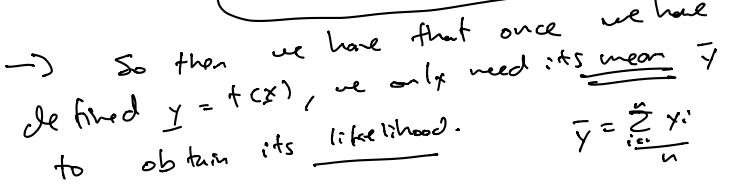

In [8]:
n = len(bmi_data['BMI'])
suff_stats = np.array(evens_bmi.mean())
suff_stats, n

(array([ 1.02366608,  1.19126353,  1.54307988,  2.18098592,  3.30657561,
         5.30197855,  8.88940531, 15.44301399, 27.6002443 ]),
 500)

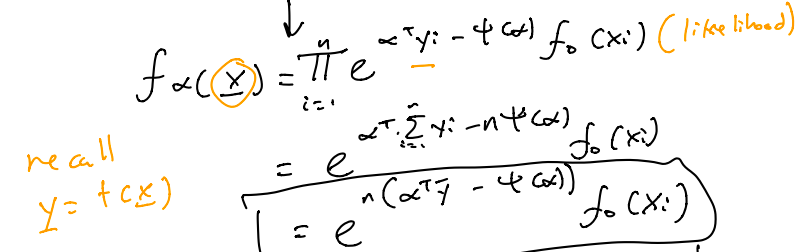

In [9]:
def psi_func_gen(alphas):
    
    f = lambda x: np.exp(sum ([alpha * x ** (i+1) for i,alpha in enumerate(alphas)]) )
    
    integ_val = integrate.quad(f, 0.3, 2.2)[0] #integrate over the sampel space (see abobe hist)
    psi_val = np.log(integ_val)
    
    return psi_val

In [10]:
def exp_family_negative_loglik(alphas, n, y_bar):
    
    f = lambda x: np.exp(sum ([alpha * x ** (i+1) for i,alpha in enumerate(alphas)]) )
    
    integ_val = integrate.quad(f, 0.4, 2.1)[0] #integrate over the sampel space (see abobe hist)
    psi = np.log(integ_val)
    
    loglik = n * (sum ([alpha * y_bar[i] for i,alpha in enumerate(alphas)])- psi)
    
    return -loglik

In [11]:
minimize(lambda theta: exp_family_negative_loglik(theta,
                                                  n,
                                                  suff_stats), 
                     np.zeros(9), method='L-BFGS-B')

      fun: 176.83998200103622
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.10437304,  0.00946159, -0.01342073,  0.0239055 ,  0.04707488,
        0.00728448, -0.04037872,  0.0712447 ,  0.11468728])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 790
      nit: 68
   status: 0
  success: True
        x: array([ 1.66962581,  1.03289223, -0.31672458, -1.10766657, -0.73280559,
        0.48112233,  1.00808206, -0.85517223,  0.18465647])

In [12]:
theta_hat = minimize(lambda theta: exp_family_negative_loglik(theta,
                                                              n,
                                                              suff_stats), 
                     np.zeros(9), method='L-BFGS-B')['x']
theta_hat

array([ 1.66962581,  1.03289223, -0.31672458, -1.10766657, -0.73280559,
        0.48112233,  1.00808206, -0.85517223,  0.18465647])

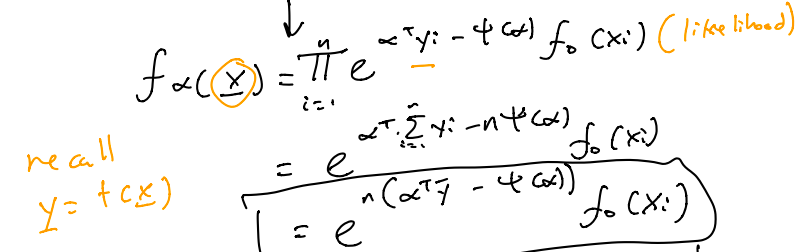

In [13]:
pdf = lambda df: np.exp((np.dot(df, theta_hat) - 
                         psi_func_gen(theta_hat)))

In [14]:
pdf_vals = evens_bmi.apply(pdf, axis=1)
pdf_vals

1      0.455536
3      0.484098
5      0.501615
7      0.513617
9      0.521009
         ...   
491    0.103324
493    0.103204
495    0.109599
497    0.129827
499    0.250393
Length: 250, dtype: float64

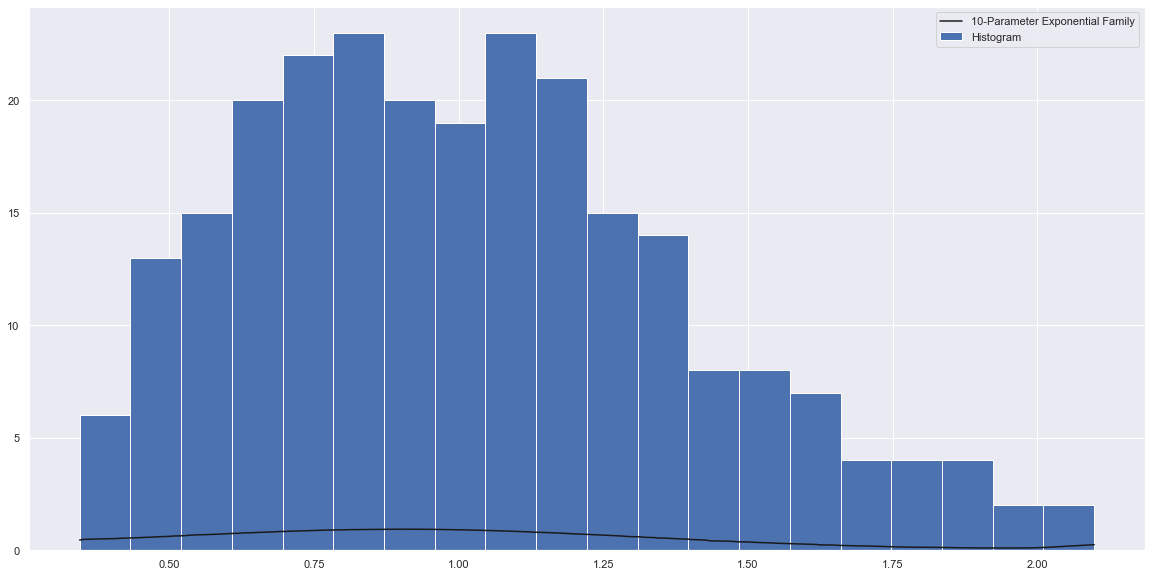

In [15]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
#ax.plot((np.linspace(0.3,2.2, 200)), pdf_vals_2p, 'or')
plt.hist(odds_bmi["BMI"],bins=20)
ax.plot(odds_bmi, pdf_vals, '-k')

ax.legend(['10-Parameter Exponential Family', 'Histogram'])
